## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

print("libraries imported successfully")

libraries imported successfully


## Load the data set

In [2]:
df = pd.read_csv("../data/diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Analyzing the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

## Checking Missing Values

In [7]:
null_val = df.isnull().sum()
if null_val.sum() == 0:
    print("No missing values in the dataset")
else:
    print(null_val)

No missing values in the dataset


## Checking for the duplicate values

In [8]:
dup_val = df.duplicated().sum()
if dup_val == 0:
    print("No duplicate values in the dataset")
else:
    print(f"Number of duplicate values: {dup_val}")

No duplicate values in the dataset


## Data Visualization and Distribution

--- Target Variable Distribution ---
Outcome
0    500
1    268
Name: count, dtype: int64

Diabetes rate: 34.90%


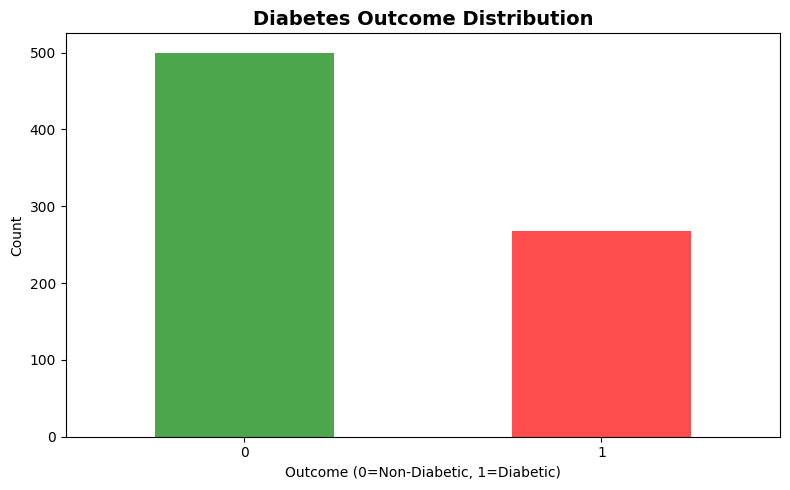

In [9]:
# Target variable distribution
print("--- Target Variable Distribution ---")
print(df['Outcome'].value_counts())
print(f"\nDiabetes rate: {df['Outcome'].mean():.2%}")

# Visualize outcome distribution
plt.figure(figsize=(8, 5))
df['Outcome'].value_counts().plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Diabetes Outcome Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

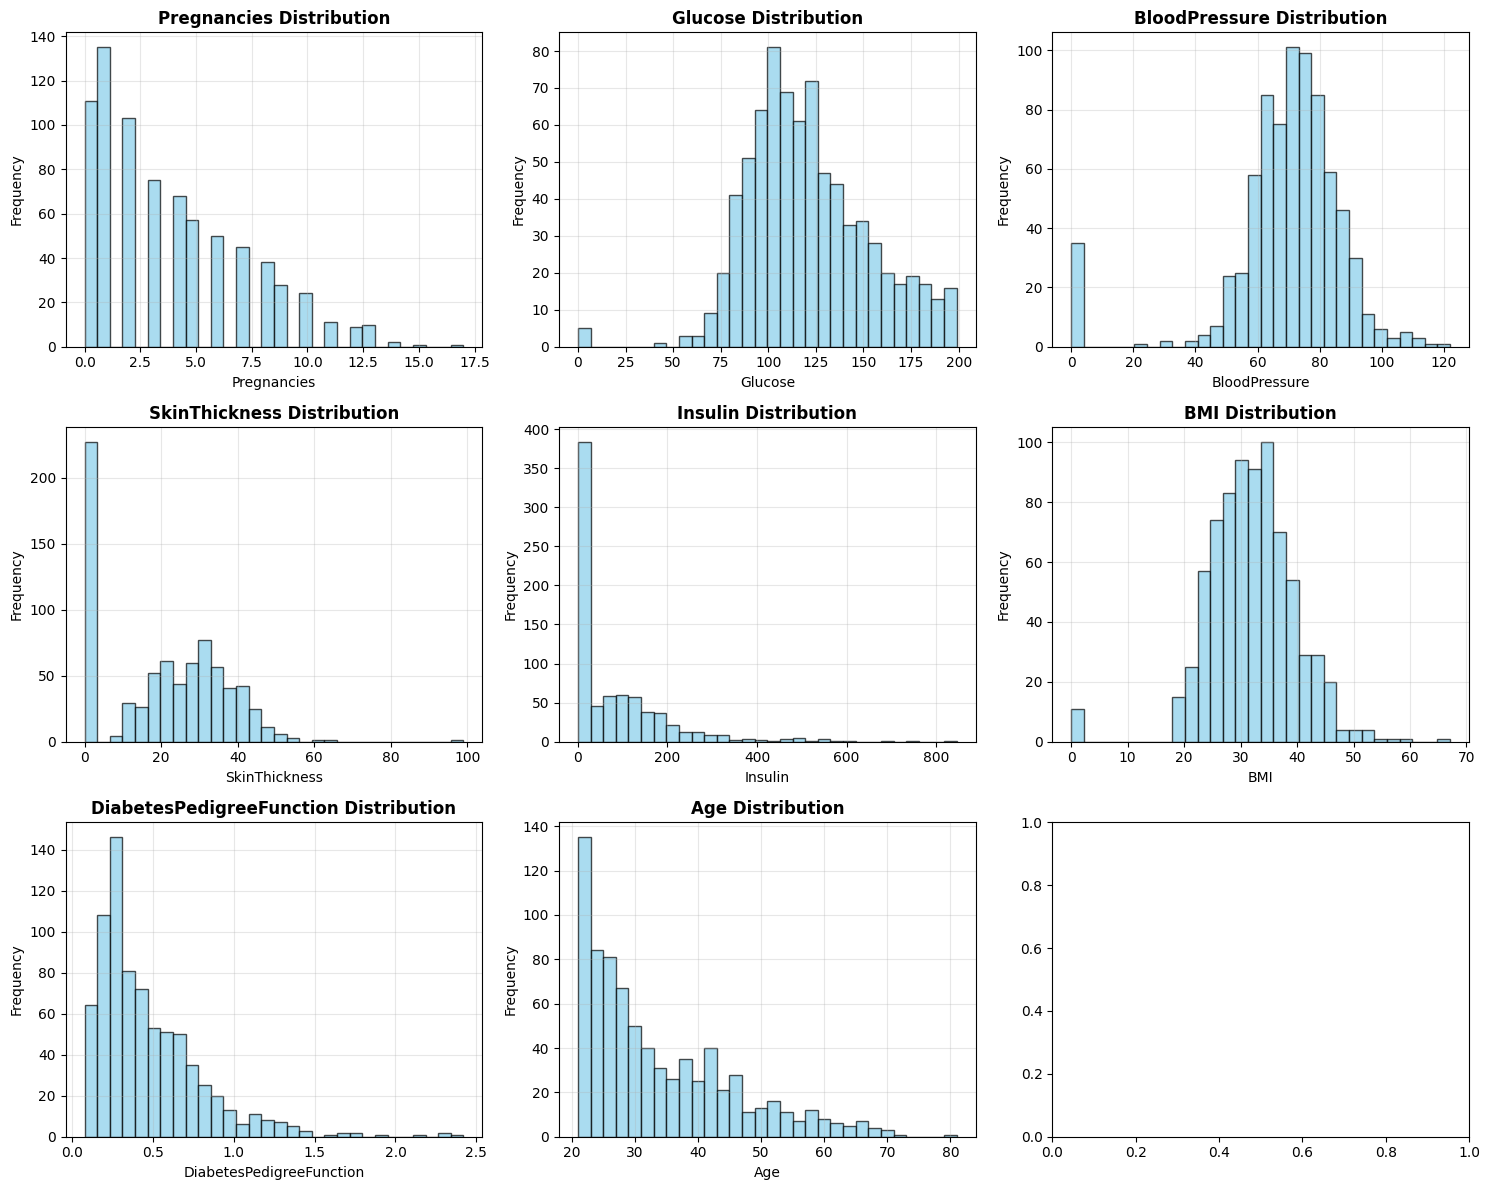

In [10]:
# Feature distributions
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:-1]):  # Exclude 'Outcome'
    axes[idx].hist(df[col], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Correlation Analysis

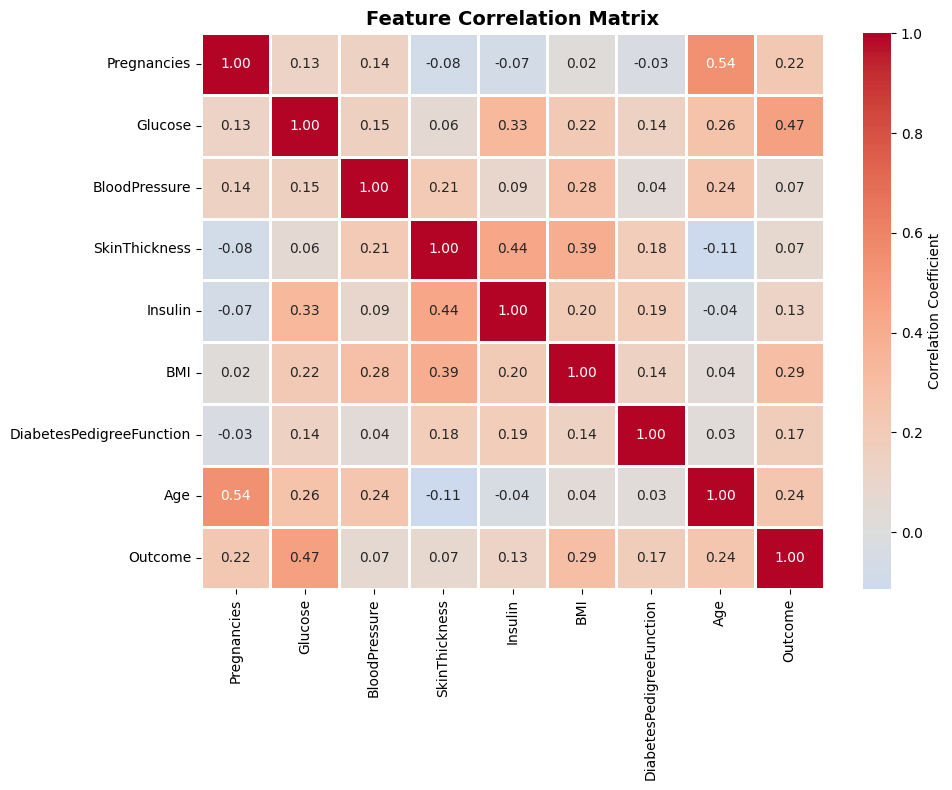


--- Correlation with Outcome (Diabetes) ---
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [11]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlation with target variable
print("\n--- Correlation with Outcome (Diabetes) ---")
target_corr = correlation['Outcome'].sort_values(ascending=False)
print(target_corr)

## Data Preprocessing and Feature Engineering

In [12]:
# Check for zeros in features that shouldn't have zeros
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("--- Zero Values in Features ---")
for col in zero_features:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

# Replace zeros with median (more robust to outliers)
df_clean = df.copy()
for col in zero_features:
    if (df_clean[col] == 0).sum() > 0:
        median_val = df_clean[df_clean[col] != 0][col].median()
        df_clean[col] = df_clean[col].replace(0, median_val)
        
print("\n✅ Zero values replaced with median values")

--- Zero Values in Features ---
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)

✅ Zero values replaced with median values


## Split Data into Train, Validation, and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Split: 70% train, 20% test, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=(1/3), random_state=42, stratify=y_temp
)

print(f"Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df_clean)*100:.1f}%)")
print(f"\nFeatures: {X_train.shape[1]}")

Training set:   537 samples (69.9%)
Test set:       154 samples (20.1%)
Validation set: 77 samples (10.0%)

Features: 8


## Feature Normalization (Standardization)

In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

print("✅ Features normalized using StandardScaler")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Mean of scaled features: {X_train_scaled.mean():.4f}")
print(f"Std of scaled features: {X_train_scaled.std():.4f}")

✅ Features normalized using StandardScaler

Scaled training data shape: (537, 8)
Mean of scaled features: 0.0000
Std of scaled features: 1.0000


## Train Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_model = LogisticRegression(max_iter=1000, random_state=42, solver='lbfgs')
log_model.fit(X_train_scaled, y_train)

print("✅ Logistic Regression model trained successfully!")
print(f"\nModel parameters:")
print(f"  - Solver: {log_model.solver}")
print(f"  - Max iterations: {log_model.max_iter}")
print(f"  - Number of features: {log_model.n_features_in_}")

✅ Logistic Regression model trained successfully!

Model parameters:
  - Solver: lbfgs
  - Max iterations: 1000
  - Number of features: 8


## Model Evaluation

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Make predictions on all sets
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)
y_val_pred = log_model.predict(X_val_scaled)

# Calculate accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
val_acc = accuracy_score(y_val, y_val_pred)

print("="*60)
print("ACCURACY SCORES")
print("="*60)
print(f"Training Accuracy:   {train_acc:.4f} ({train_acc*100:.2f}%)")
print(f"Test Accuracy:       {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"Validation Accuracy: {val_acc:.4f} ({val_acc*100:.2f}%)")
print("="*60)

ACCURACY SCORES
Training Accuracy:   0.7858 (78.58%)
Test Accuracy:       0.7403 (74.03%)
Validation Accuracy: 0.7532 (75.32%)


In [17]:
# Classification report for test set
print("\n--- Classification Report (Test Set) ---")
print(classification_report(y_test, y_test_pred, target_names=['Non-Diabetic', 'Diabetic']))

# Classification report for validation set
print("\n--- Classification Report (Validation Set) ---")
print(classification_report(y_val, y_val_pred, target_names=['Non-Diabetic', 'Diabetic']))


--- Classification Report (Test Set) ---
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.85      0.81       100
    Diabetic       0.66      0.54      0.59        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.73      0.74      0.73       154


--- Classification Report (Validation Set) ---
              precision    recall  f1-score   support

Non-Diabetic       0.77      0.88      0.82        50
    Diabetic       0.70      0.52      0.60        27

    accuracy                           0.75        77
   macro avg       0.74      0.70      0.71        77
weighted avg       0.75      0.75      0.74        77



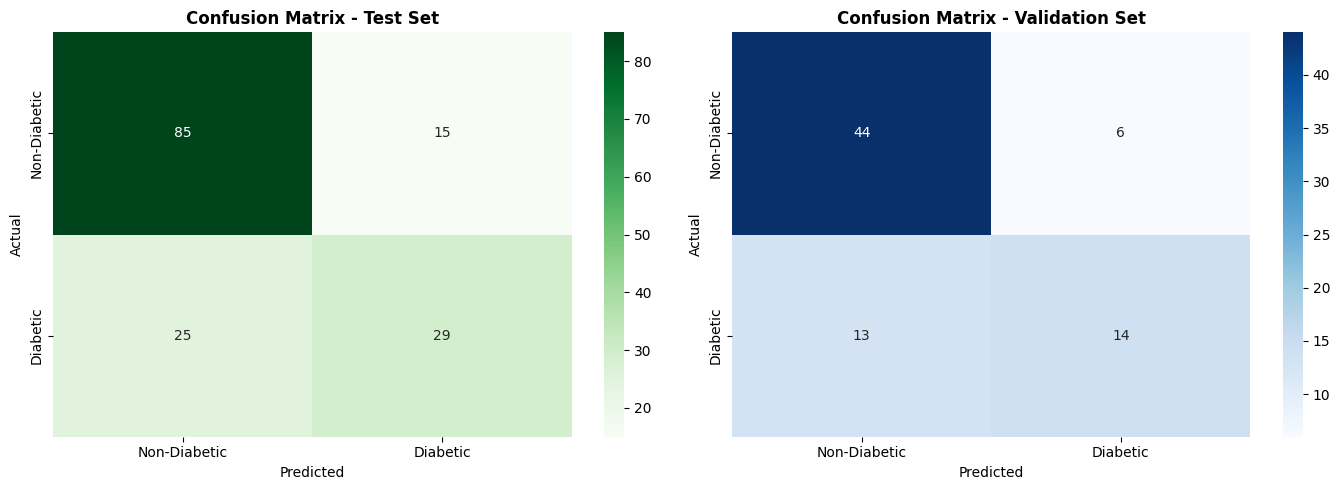

In [18]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Test set confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[0], 
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
axes[0].set_title('Confusion Matrix - Test Set', fontweight='bold')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Validation set confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Non-Diabetic', 'Diabetic'], 
            yticklabels=['Non-Diabetic', 'Diabetic'])
axes[1].set_title('Confusion Matrix - Validation Set', fontweight='bold')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Test ROC-AUC:       0.8281
Validation ROC-AUC: 0.8504


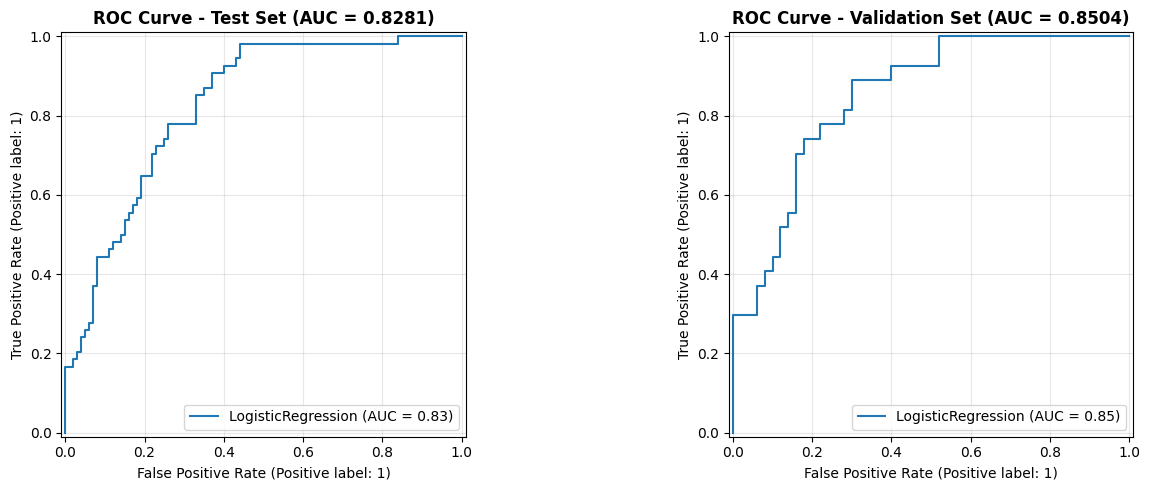

In [19]:
# ROC-AUC Score and ROC Curve
from sklearn.metrics import RocCurveDisplay

# Calculate ROC-AUC for test and validation sets
y_test_proba = log_model.predict_proba(X_test_scaled)[:, 1]
y_val_proba = log_model.predict_proba(X_val_scaled)[:, 1]

test_roc_auc = roc_auc_score(y_test, y_test_proba)
val_roc_auc = roc_auc_score(y_val, y_val_proba)

print(f"Test ROC-AUC:       {test_roc_auc:.4f}")
print(f"Validation ROC-AUC: {val_roc_auc:.4f}")

# Plot ROC curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test, ax=axes[0])
axes[0].set_title(f'ROC Curve - Test Set (AUC = {test_roc_auc:.4f})', fontweight='bold')
axes[0].grid(alpha=0.3)

RocCurveDisplay.from_estimator(log_model, X_val_scaled, y_val, ax=axes[1])
axes[1].set_title(f'ROC Curve - Validation Set (AUC = {val_roc_auc:.4f})', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Importance Analysis

--- Feature Importance (Coefficients) ---
                    Feature  Coefficient  Abs_Coefficient
1                   Glucose     1.127970         1.127970
5                       BMI     0.734506         0.734506
0               Pregnancies     0.461364         0.461364
6  DiabetesPedigreeFunction     0.215647         0.215647
7                       Age     0.100998         0.100998
3             SkinThickness    -0.091727         0.091727
2             BloodPressure    -0.041583         0.041583
4                   Insulin    -0.034909         0.034909


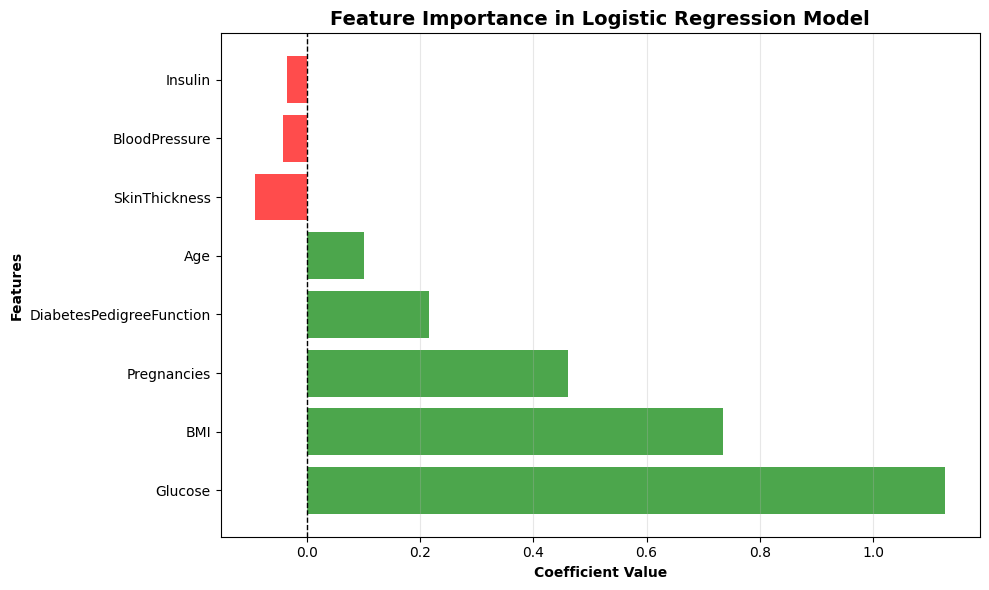


📊 Positive coefficients increase diabetes risk
📊 Negative coefficients decrease diabetes risk


In [20]:
# Extract feature coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0],
    'Abs_Coefficient': np.abs(log_model.coef_[0])
}).sort_values(by='Abs_Coefficient', ascending=False)

print("--- Feature Importance (Coefficients) ---")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'green' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coefficient Value', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('Feature Importance in Logistic Regression Model', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\n📊 Positive coefficients increase diabetes risk")
print("📊 Negative coefficients decrease diabetes risk")

## Prediction Function for New Patients

In [21]:
def predict_diabetes(pregnancies, glucose, blood_pressure, skin_thickness, 
                    insulin, bmi, diabetes_pedigree, age):
    """
    Predict diabetes for a new patient
    
    Parameters:
    - pregnancies: Number of pregnancies
    - glucose: Glucose level
    - blood_pressure: Blood pressure (mm Hg)
    - skin_thickness: Skin thickness (mm)
    - insulin: Insulin level (mu U/ml)
    - bmi: Body Mass Index
    - diabetes_pedigree: Diabetes Pedigree Function
    - age: Age in years
    
    Returns:
    - prediction: 'DIABETIC' or 'NON-DIABETIC'
    - confidence: Confidence percentage
    - probabilities: Dictionary with probability for each class
    """
    # Create sample dataframe
    sample = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BloodPressure': [blood_pressure],
        'SkinThickness': [skin_thickness],
        'Insulin': [insulin],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [diabetes_pedigree],
        'Age': [age]
    })
    
    # Scale features
    sample_scaled = scaler.transform(sample)
    
    # Make prediction
    prediction = log_model.predict(sample_scaled)[0]
    proba = log_model.predict_proba(sample_scaled)[0]
    
    result = "DIABETIC" if prediction == 1 else "NON-DIABETIC"
    confidence = max(proba[0], proba[1])
    probabilities = {
        'Non-Diabetic': proba[0],
        'Diabetic': proba[1]
    }
    
    return result, confidence, probabilities

print("✅ Prediction function created successfully!")

✅ Prediction function created successfully!


## Test Predictions with Sample Patients

In [22]:
# Sample 1: High-risk patient
print("="*70)
print("SAMPLE 1 - High Risk Patient")
print("="*70)
result1, conf1, prob1 = predict_diabetes(
    pregnancies=6,
    glucose=148,
    blood_pressure=72,
    skin_thickness=35,
    insulin=0,
    bmi=33.6,
    diabetes_pedigree=0.627,
    age=50
)
print(f"Prediction: {result1}")
print(f"Confidence: {conf1:.2%}")
print(f"Probabilities: Non-Diabetic={prob1['Non-Diabetic']:.2%}, Diabetic={prob1['Diabetic']:.2%}")

# Sample 2: Low-risk patient
print("\n" + "="*70)
print("SAMPLE 2 - Low Risk Patient")
print("="*70)
result2, conf2, prob2 = predict_diabetes(
    pregnancies=1,
    glucose=85,
    blood_pressure=66,
    skin_thickness=29,
    insulin=0,
    bmi=26.6,
    diabetes_pedigree=0.351,
    age=31
)
print(f"Prediction: {result2}")
print(f"Confidence: {conf2:.2%}")
print(f"Probabilities: Non-Diabetic={prob2['Non-Diabetic']:.2%}, Diabetic={prob2['Diabetic']:.2%}")

# Sample 3: Moderate-risk patient
print("\n" + "="*70)
print("SAMPLE 3 - Moderate Risk Patient")
print("="*70)
result3, conf3, prob3 = predict_diabetes(
    pregnancies=3,
    glucose=120,
    blood_pressure=70,
    skin_thickness=30,
    insulin=100,
    bmi=28.5,
    diabetes_pedigree=0.45,
    age=40
)
print(f"Prediction: {result3}")
print(f"Confidence: {conf3:.2%}")
print(f"Probabilities: Non-Diabetic={prob3['Non-Diabetic']:.2%}, Diabetic={prob3['Diabetic']:.2%}")
print("="*70)

SAMPLE 1 - High Risk Patient
Prediction: DIABETIC
Confidence: 68.25%
Probabilities: Non-Diabetic=31.75%, Diabetic=68.25%

SAMPLE 2 - Low Risk Patient
Prediction: NON-DIABETIC
Confidence: 96.50%
Probabilities: Non-Diabetic=96.50%, Diabetic=3.50%

SAMPLE 3 - Moderate Risk Patient
Prediction: NON-DIABETIC
Confidence: 80.87%
Probabilities: Non-Diabetic=80.87%, Diabetic=19.13%


## Model Summary